In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Loading the data

In [23]:
# Creating DataFrame for the data 
df = pd.read_csv('House data.csv')

Initial data inspaction

In [24]:
# Check for basic info and missing values
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   House Price in Birr  36 non-null     int64
 1   Bedrooms             36 non-null     int64
 2   SqFtArea             36 non-null     int64
 3   Age                  36 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


House Price in Birr  Bedrooms  SqFtArea  Age
0             11800000         3       230   31
1             13750000         4       270   12
2             11600000         3       229   31
3             11390000         3       205   11
4             12300000         4       188   30

Handling missing values

In [25]:
# Check for missing values
df.isnull().sum()

House Price in Birr    0
Bedrooms               0
SqFtArea               0
Age                    0
dtype: int64

 We know that house price is the targert and bedrooms,sqftArea and age  are features. 

Exploring Relationships Between Features and Target.

                      Price vs SqFtArea

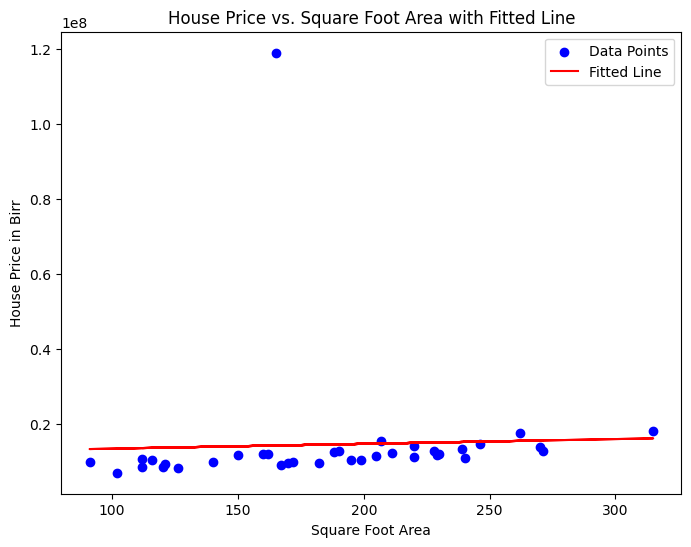

In [26]:
# Scatter plot for House Price vs. SqFtArea
plt.figure(figsize=(8, 6))

# Scatter plot for House Price vs. SqFtArea
plt.scatter(df['SqFtArea'], df['House Price in Birr'], color='blue', label='Data Points')

# Fitting a line (linear regression)
m, b = np.polyfit(df['SqFtArea'], df['House Price in Birr'], 1)  # Fit a line: m = slope, b = intercept
plt.plot(df['SqFtArea'], m * df['SqFtArea'] + b, color='red', label='Fitted Line')

# Plotting title and labels
plt.title('House Price vs. Square Foot Area with Fitted Line')
plt.xlabel('Square Foot Area')
plt.ylabel('House Price in Birr')

# Show legend and plot
plt.legend()
plt.show()


                         price vs bedrooms

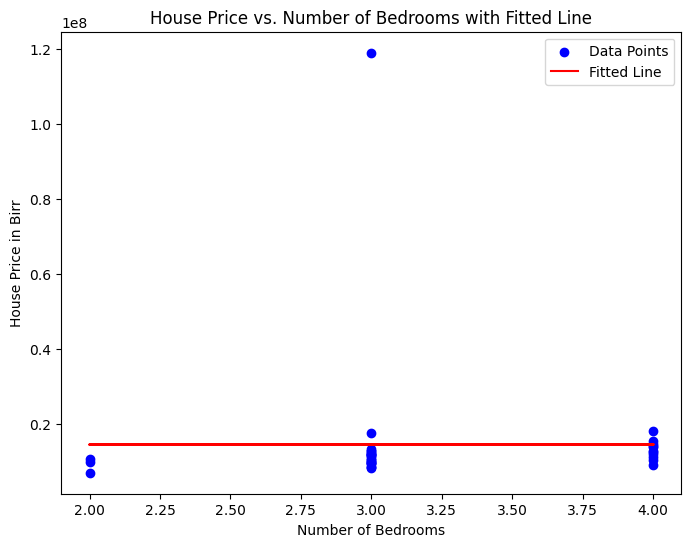

In [27]:
# Scatter plot for House Price vs. Bedrooms
plt.figure(figsize=(8, 6))

# Scatter plot for House Price vs. Bedrooms
plt.scatter(df['Bedrooms'], df['House Price in Birr'], color='blue', label='Data Points')

# Fitting a line (linear regression)
m, b = np.polyfit(df['Bedrooms'], df['House Price in Birr'], 1)  # Fit a line: m = slope, b = intercept
plt.plot(df['Bedrooms'], m * df['Bedrooms'] + b, color='red', label='Fitted Line')

# Plotting title and labels
plt.title('House Price vs. Number of Bedrooms with Fitted Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price in Birr')

# Show legend and plot
plt.legend()
plt.show()

                                   Price vs Area

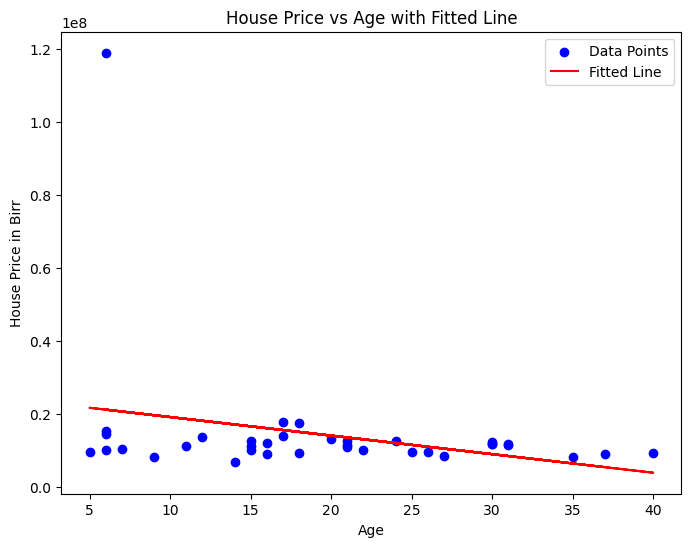

In [28]:
# Scatter plot for House Price vs. Age
plt.figure(figsize=(8, 6))

# Scatter plot for House Price vs. Age
plt.scatter(df['Age'], df['House Price in Birr'], color='blue', label='Data Points')

# Fitting a line (linear regression)
m, b = np.polyfit(df['Age'], df['House Price in Birr'], 1)  # Fit a line: m = slope, b = intercept
plt.plot(df['Age'], m * df['Age'] + b, color='red', label='Fitted Line')

# Plotting title and labels
plt.title('House Price vs Age with Fitted Line')
plt.xlabel('Age')
plt.ylabel('House Price in Birr')

# Show legend and plot
plt.legend()
plt.show()


                Let show them on correlation matrix

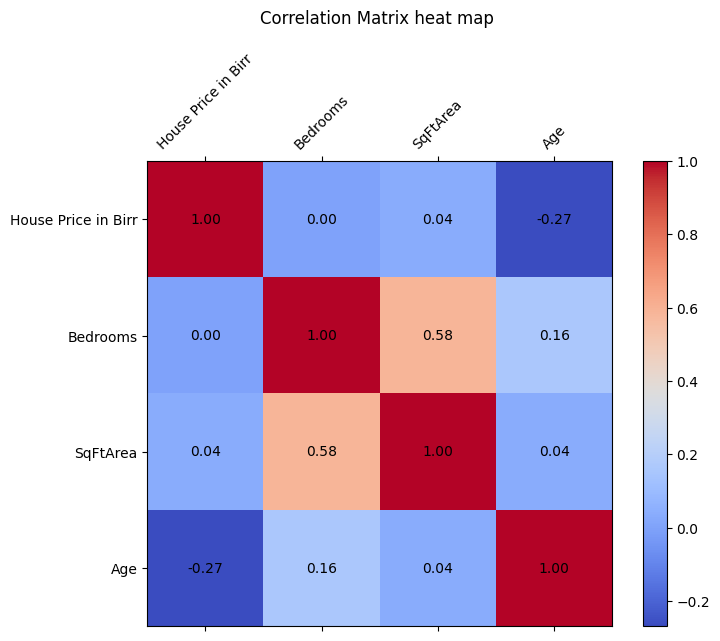

In [29]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)  # Plotting the correlation matrix as a heatmap
plt.colorbar()
plt.title('Correlation Matrix heat map ', pad=20)

# Adding the correlation matrix values on the heatmap
for (i, j), val in np.ndenumerate(corr_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)
plt.show()

  let's split the data in to training(70%) and tasting(30)

In [30]:
# Define features (X) and target variable (y)
X = df[['Bedrooms', 'SqFtArea', 'Age']]  # Features
y = df['House Price in Birr']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 25 samples
Test set size: 11 samples


  We are going to use multiple linear regression model to predict the house price

 Let's train the model using the training data sets

In [31]:
# Define the model
mlr_model = LinearRegression()

# Train the model on the training data
mlr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = mlr_model.predict(X_test)

Now let's evaluate  our models

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Print results
print("Multiple Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Multiple Linear Regression Results:
Mean Squared Error: 85561197961531.09
R-squared: -11.24


From the above result (Mean Squared Error: 85561197961531.09
R-squared: -11.24),  the model has poor predictive power and is failing to capture the relationship between the features and the target variable.
The MSE is very large, suggesting the model is making substantial errors in its predictions. This is often a sign of an inappropriate model or issues in the data.


So what shall we do ?
We prefer to clean the data again and try to remove the outliers using  IQR method which improve our data quality.

        Remove Outliers using  IQR method

In [33]:
# Removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


We going to use sklearn.preprocessing.StandardScaler  library and is used to standardize or normalize features by transforming them so that they have a mean of 0 (centered around 0) and a standard deviation of 1. 

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Bedrooms', 'SqFtArea', 'Age']] = scaler.fit_transform(df[['Bedrooms', 'SqFtArea', 'Age']])


Correlation Analysis: Identify which features are most correlated with House Price in Birr

In [35]:
correlation_matrix = df.corr()
print(correlation_matrix['House Price in Birr'].sort_values(ascending=False))


House Price in Birr    1.000000
SqFtArea               0.733686
Bedrooms               0.536117
Age                   -0.235812
Name: House Price in Birr, dtype: float64


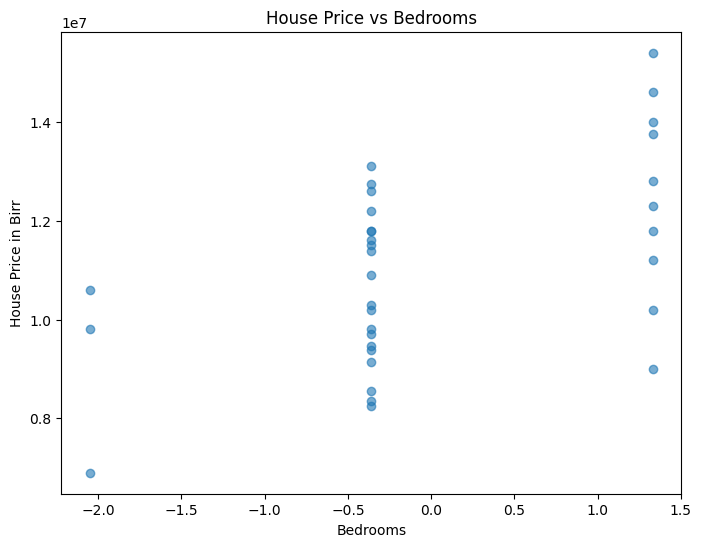

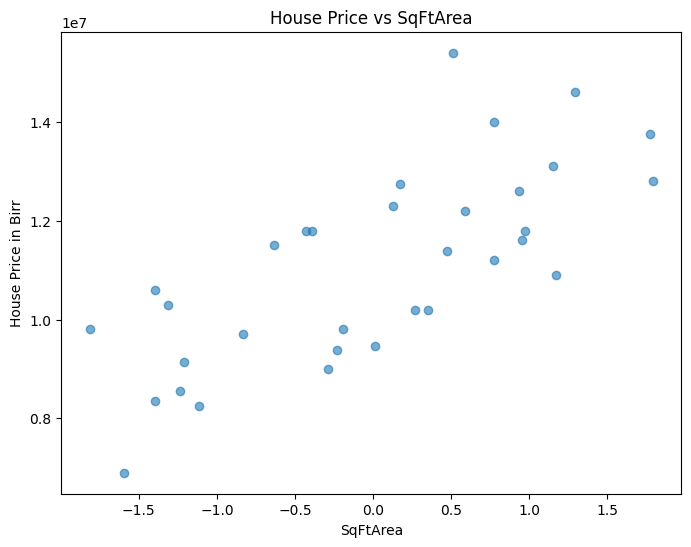

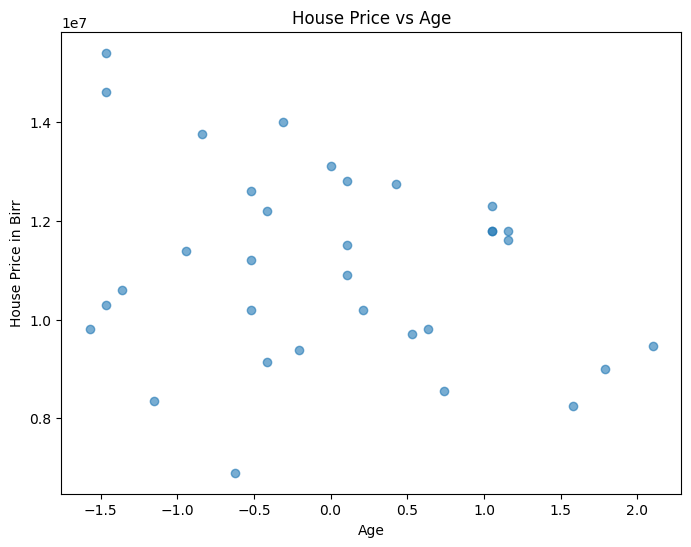

In [36]:
#Confirm the linearity between features and the target:
for feature in ['Bedrooms', 'SqFtArea', 'Age']:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['House Price in Birr'], alpha=0.6)
    plt.title(f'House Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('House Price in Birr')
    plt.show()

In [37]:
X = df[['Bedrooms', 'SqFtArea', 'Age']]  # Features
y = df['House Price in Birr']            # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 23 samples
Test set size: 10 samples


Again we are going to use multiple linear regression 

In [38]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


 Evaluating the model

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 880862021850.6461
R-squared: 0.7724781419915785


Now our model is much better than before

  Interpret regression coefficients.

In [40]:
# Accessing the coefficients
coefficients = model.coef_
# Accessing the intercept 
intercept = model.intercept_

# Displaying the results
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 11042603.811659107
Coefficients: [ 200728.66087245 1305507.21968416 -512958.59286402]


In [44]:
# Calculate residuals: Actual values - Predicted values
residuals = y_test - y_pred
print(residuals)


34    2.924270e+05
16    8.503784e+05
28   -4.335334e+05
18   -5.959003e+05
8     1.541455e+06
9    -7.959584e+05
21   -4.311407e+05
23   -1.384460e+06
13    1.523317e+06
0     1.554898e+05
Name: House Price in Birr, dtype: float64


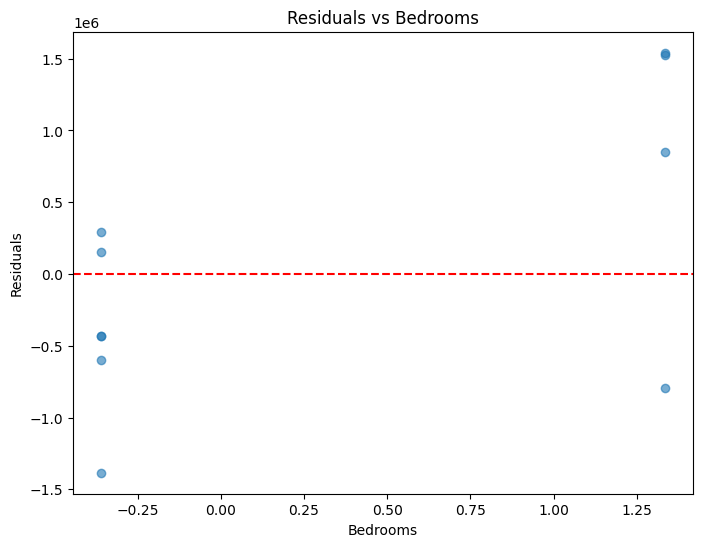

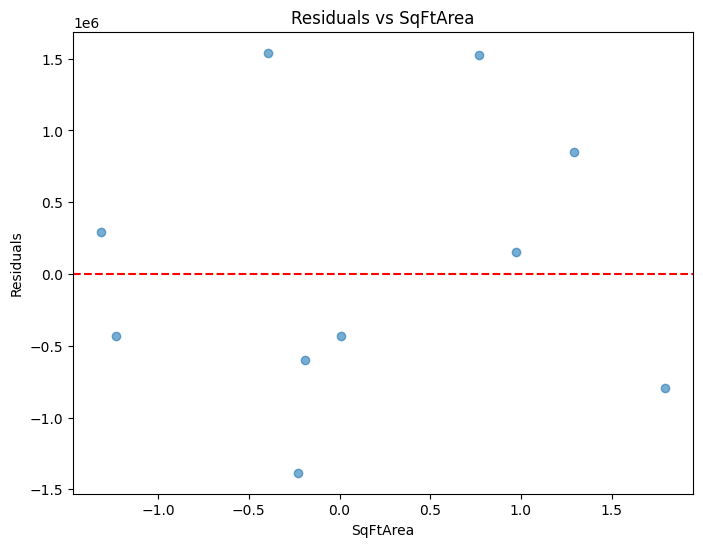

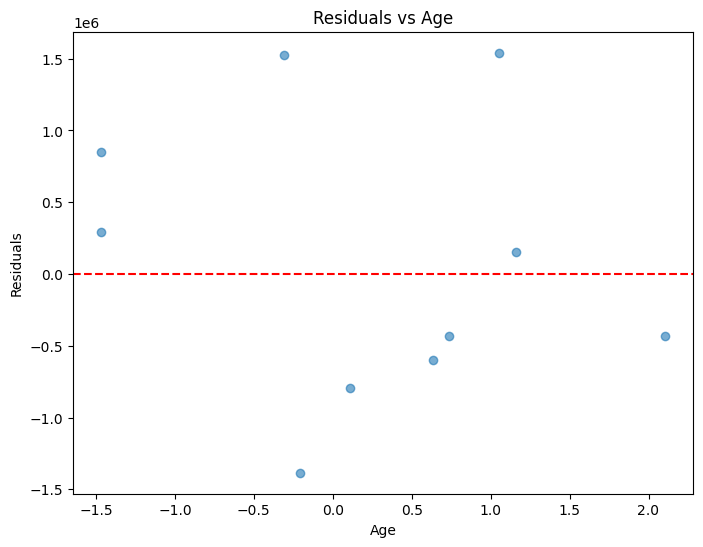

In [42]:
# Create scatter plots of residuals vs each feature
features = ['Bedrooms', 'SqFtArea', 'Age']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')  # Red dashed line at zero residuals
    plt.title(f'Residuals vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.show()

Group Members:         ID
 1. Mohammedkemal      1601534
 2. Rekik              1601577
 3. Rediet             1601573
 4. Lamesgn            1601853
 5. Rediet             1601572